# Test Artifacts from Claude

In [1]:
import logging
import sys

from dotenv import load_dotenv

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns


# LOGGER
logger = logging.getLogger()
logging.basicConfig(
    stream=sys.stdout,
    level=logging.INFO,
    format='%(asctime)s %(message)s',
    datefmt='%Y-%m-%y %H:%M:%S',
)


# MODULE RELOAD
%load_ext autoreload
%autoreload 2


# Load dotenv
_ = load_dotenv()

## Layout generator

/home/songz/Git/Torch-wake/.venv/lib/python3.12/site-packages/pydantic/_internal/_generate_schema.py:628: UserWarning: <scipy.stats._continuous_distns.vonmises_gen object at 0x7f67321969f0> is not a Python type (it may be an instance of an object), Pydantic will allow any object with no validation since we cannot even enforce that the input is an instance of the given type. To get rid of this error wrap the type with `pydantic.SkipValidation`.
  warn(


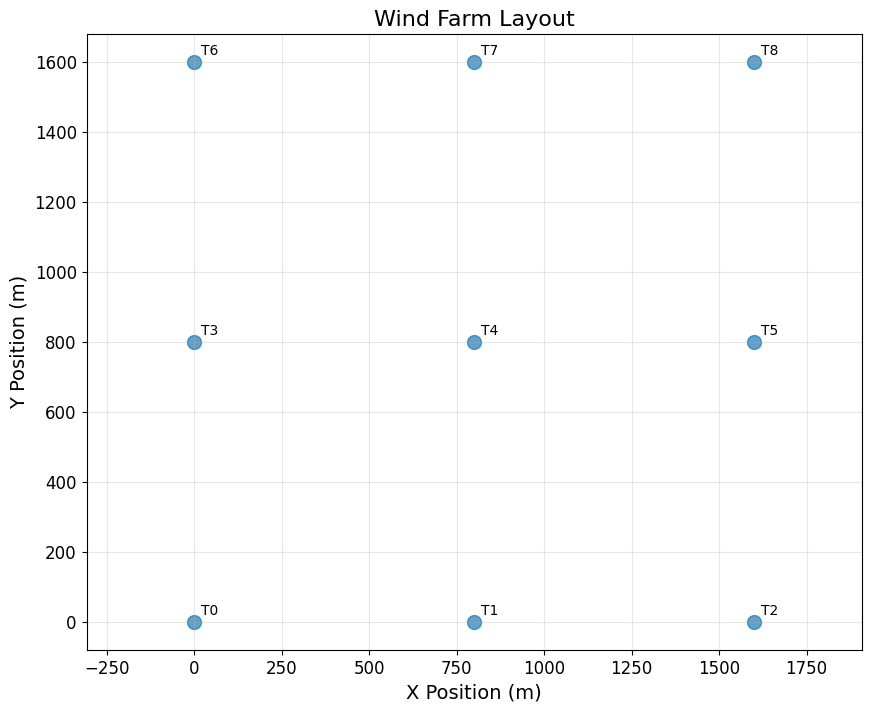

In [2]:
from torch_wake import LayoutGenerator


# Init
generator = LayoutGenerator()

# Get layout
layout_df = generator.generate_grid(9)

# Plot 
generator.visualize_layout(layout_df)

In [3]:
from torch_wake import MixtureFlowGenerator

generator = (
    MixtureFlowGenerator(
        random_seed=4093
    )
    .init_generator()
)

# generator.init_generator()

2025-09-25 20:57:59 Initialize generator terms


In [8]:
wind_ds = generator.sample(10000)

[Text(0.5, 0, ''), Text(0, 0.5, ''), None, None]

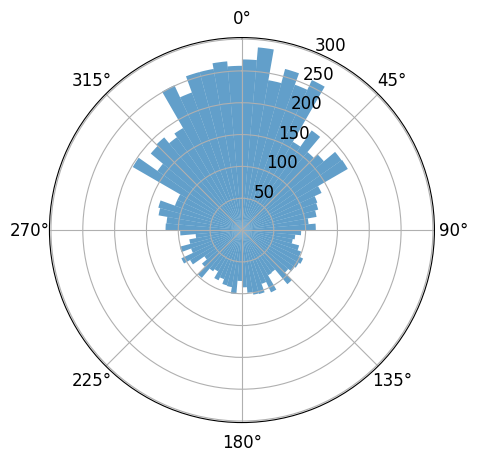

In [9]:
data = (
    wind_ds['wd']
    .pipe(np.deg2rad)
    .to_dataframe()
    .reset_index()
)

fig, ax = plt.subplots(
    figsize=(6, 5),
    subplot_kw={'projection': 'polar'},
)


sns.histplot(
    data=data,
    x='wd',
    bins=np.linspace(0, 2 * np.pi, 73),
    alpha=.7,
    edgecolor='k',
)

ax.set(
    xlabel=None,
    ylabel=None,
    theta_direction=-1,
    theta_zero_location='N'
)

[]

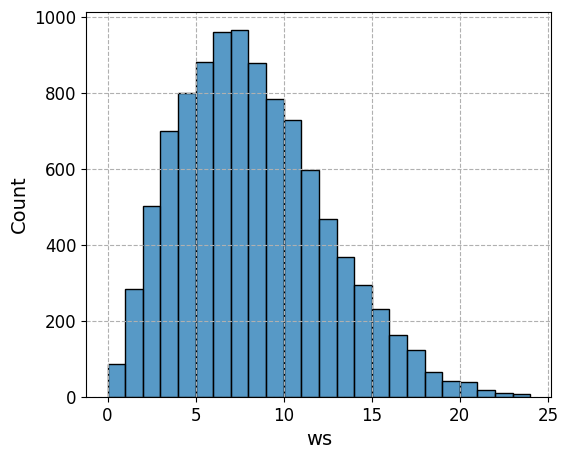

In [10]:
data = (
    wind_ds['ws']
    .to_dataframe()
    .reset_index()
)

fig, ax = plt.subplots(figsize=(6, 5))
ax.grid(ls='--')


sns.histplot(
    data=data,
    x='ws',
    bins=np.arange(0, 25),
)

ax.set()

In [11]:
from py_wake.deficit_models import NOJDeficit
from py_wake.examples.data.hornsrev1 import V80
from py_wake.site import UniformWeibullSite
from py_wake.wind_farm_models import PropagateDownwind



wf_model = PropagateDownwind(
    generator.create_site(),
    V80(),
    NOJDeficit()
)



In [16]:
from torch_wake.generate_synthetic_data import dummy_wind


wind_ds = dummy_wind()
sim_res = wf_model(
    layout_df['x'],
    layout_df['y'],
    wd=wind_ds['wd'].data,
    ws=wind_ds['ws'].data,
    TI=wind_ds['ti'].data,
    time=wind_ds['time']
)
sim_res

<xarray.SimulationResult> Size: 436kB
Dimensions:      (wt: 9, time: 1296)
Coordinates:
  * time         (time) int64 10kB 0 1 2 3 4 5 ... 1290 1291 1292 1293 1294 1295
  * wt           (wt) int64 72B 0 1 2 3 4 5 6 7 8
    wd           (time) int64 10kB 0 5 10 15 20 25 ... 330 335 340 345 350 355
    ws           (time) int64 10kB 3 3 3 3 3 3 3 3 3 ... 20 20 20 20 20 20 20 20
    type         (wt) int64 72B 0 0 0 0 0 0 0 0 0
Data variables:
    WS_eff       (wt, time) float64 93kB 3.0 3.0 3.0 3.0 ... 20.0 20.0 20.0 20.0
    TI_eff       (wt, time) float64 93kB 0.1 0.1 0.1 0.1 0.1 ... 0.1 0.1 0.1 0.1
    Power        (wt, time) float64 93kB 0.0 0.0 0.0 0.0 ... 2e+06 2e+06 2e+06
    CT           (wt, time) float64 93kB 0.0 0.0 0.0 0.0 ... 0.102 0.102 0.102
    h            (wt) float64 72B 70.0 70.0 70.0 70.0 70.0 70.0 70.0 70.0 70.0
    x            (wt) int64 72B 0 800 1600 0 800 1600 0 800 1600
    y            (wt) int64 72B 0 0 0 800 800 800 1600 1600 1600
    WD           (time) int64 10kB 0 5 10 15 20 25 ... 330 335 340 345 350 355
    TI           (time) float64 10kB 0.1 0.1 0.1 0.1 0.1 ... 0.1 0.1 0.1 0.1 0.1
    wd_bin_size  float64 8B 0.2778
    WS           (time) int64 10kB 3 3 3 3 3 3 3 3 3 ... 20 20 20 20 20 20 20 20
    P            float64 8B 0.0007716

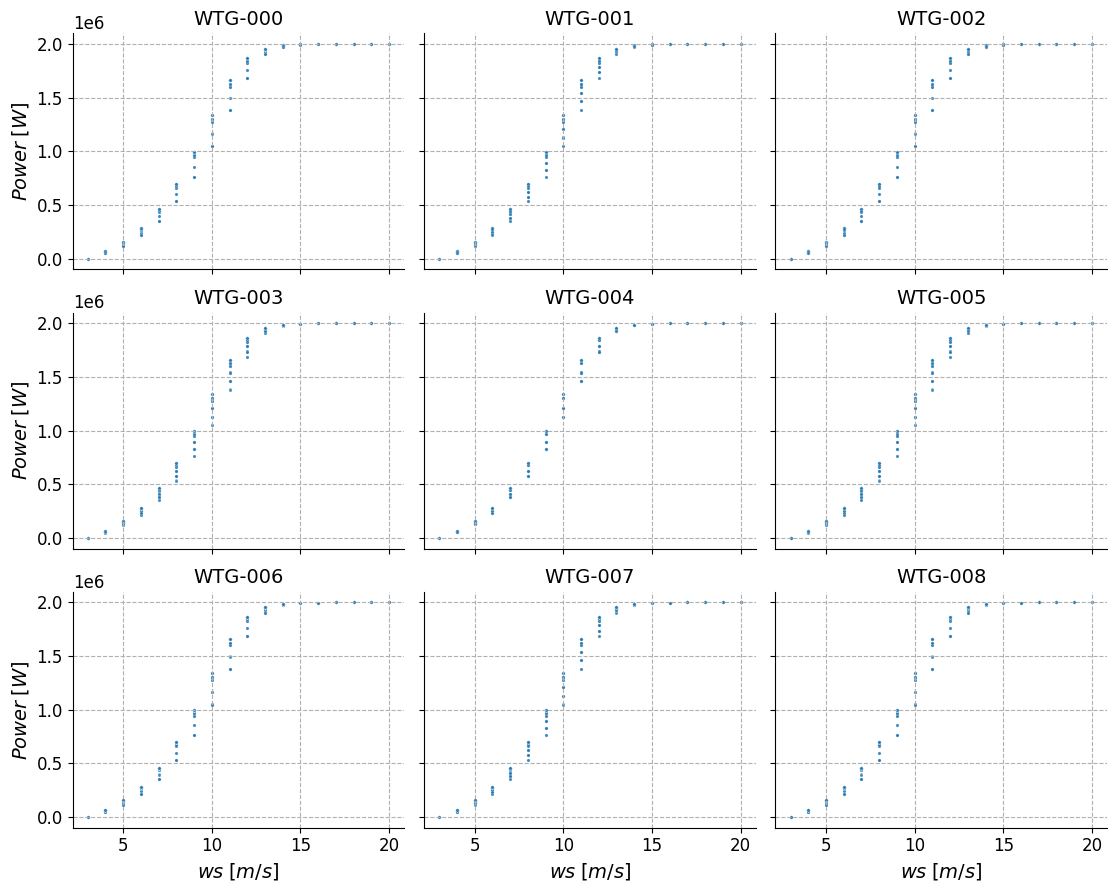

In [17]:
data = (
    sim_res
    [['Power', 'WS']]
    .to_dataframe()
    .reset_index()
)

g = sns.relplot(
    kind='scatter',
    data=data,
    x='WS',
    y='Power',
    col='wt',
    col_wrap=3,
    height=3,
    aspect=1.25,
    s=5,
    alpha=.5
)

g.set_titles(template='WTG-{col_name:03d}')
for ax in g.axes.flatten():
    ax.grid(ls='--')
    ax.set(
        xlabel=r'$ws\; [m/s]$',
        ylabel=r'$Power\; [W]$',
    )

In [76]:
# self = trainer
# simulation_results = (
#     sim_res
#     .rename({'Power': 'power'})
#     .isel(time=range(10))
#     .to_dataframe()
#     .reset_index()
# )
# target_turbine_id = 4
# df

# timestamps = simulation_results['time'].unique()
# timestamps

# edge_index = self.create_graph_structure()
# edge_index


# data_list = []


# timestamp = timestamps[0]
# ts_data = simulation_results[simulation_results['time'] == timestamp].copy()
# ts_data = ts_data.sort_values('wt').reset_index(drop=True)

# # Prepare features (exclude target turbine's power for features)
# features = []
# targets = []
# row
# for turbine_id in ts_data['wt']:
#     row = ts_data[ts_data['wt'] == turbine_id].iloc[0]

#     # Features: position, wind conditions, but not power of target turbine
#     feature_vector = [
#         row['x'] / 1000,  # Normalize position
#         row['y'] / 1000,
#         row['ws'],
#         row['wd'] / 360,  # Normalize direction
#         np.sin(np.radians(row['wd'])),  # Cyclical encoding
#         np.cos(np.radians(row['wd'])),
#     ]

#     # Add neighbor power information (if not target turbine)
#     if turbine_id != target_turbine_id:
#         feature_vector.append(row['power'] / 2000)  # Normalize power
#     else:
#         feature_vector.append(0)  # Unknown for target

#     features.append(feature_vector)
#     targets.append(row['power'])



# # Convert to tensors
# x = torch.tensor(features, dtype=torch.float)
# y = torch.tensor(targets, dtype=torch.float)

In [18]:
from sklearn.model_selection import train_test_split

import torch
from torch.nn.functional import mse_loss

from torch_wake.generate_synthetic_data import prepare_data
from torch_wake.graph import TurbineGNN, create_graph



# Create graph
edge_index = create_graph(
    layout_df['x'].values,
    layout_df['y'].values
)


# Format data
data_list = prepare_data(
    sim_res,
    edge_index,
    toi=4
)


NameError: name 'edge_index' is not defined

In [ ]:
from sklearn.model_selection import train_test_split

import torch
from torch.nn.functional import mse_loss

from torch_wake.generate_synthetic_data import prepare_data
from torch_wake.graph import TurbineGNN, create_graph


# Create graph
edge_index = create_graph(
    layout_df['x'].values,
    layout_df['y'].values
)


# Format data
data_list = prepare_data(
    sim_res,
    edge_index,
    toi=4
)

# Split train/test
train, test = train_test_split(
    data_list,
    test_size=.3,
    random_state=73
)


# Init model
model = TurbineGNN(input_features=data_list[0].x.shape[1])
optimizer = torch.optim.Adam(
    model.parameters(),
    lr=.001,
)

In [ ]:
data.x

In [193]:
for data in train:
    model(data)